In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

intensity = 1 #mW/cm2
intensity_sat = 55
s = intensity / intensity_sat

clebsh_gordan_sq = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [1, 1/2, 1/6],
    [1/2, 2/3, 1/2],
    [1/6, 1/2, 1],
    [0, 0, 0],
    [0, 0, 0]
])

input_light = np.array([[0, 0, 1]])

M = 3

clebsh_gordan_sq_eff_in = clebsh_gordan_sq*input_light

In [13]:
def dNdt(N, m):
    in1 = N[m-2]*clebsh_gordan_sq_eff_in[m-2,2]*clebsh_gordan_sq[m,0]
    in2 = N[m-1]*(clebsh_gordan_sq_eff_in[m-1,2]*clebsh_gordan_sq[m,1] + clebsh_gordan_sq_eff_in[m-1,1]*clebsh_gordan_sq[m,0])
    in3 = N[m+1]*(clebsh_gordan_sq_eff_in[m+1,0]*clebsh_gordan_sq[m,1] + clebsh_gordan_sq_eff_in[m+1,1]*clebsh_gordan_sq[m,2])
    in4 = N[m+2]*clebsh_gordan_sq_eff_in[m+2,0]*clebsh_gordan_sq[m,2]
    out1 = N[m]*clebsh_gordan_sq_eff_in[m,0]*(clebsh_gordan_sq[m-1,1]+clebsh_gordan_sq[m-2,2])
    out2 = N[m]*clebsh_gordan_sq_eff_in[m,1]*(clebsh_gordan_sq[m-1,2]+clebsh_gordan_sq[m+1,0])
    out3 = N[m]*clebsh_gordan_sq_eff_in[m,2]*(clebsh_gordan_sq[m+1,1]+clebsh_gordan_sq[m+2,0])
    return  s/(1+s)*(in1 + in2 + in3 + in4 - out1 - out2 - out3)

def system(tau, N):
    dN = [dNdt(N, m) for m in range(2, M + 2)]
    return [0, 0] + dN + [0, 0]

N_0 = np.array([0, 0, 1, 0, 0, 0, 0])

Tau = np.linspace(0,100,10000)
#sol = odeint(system, [6,0,0,0], Tau, tfirst = True)
#r, phi, t = sol.transpose()
sol = solve_ivp(system, t_span = (0,100), y0 = N_0, t_eval = Tau, atol = 10**-20, method = 'DOP853')

In [14]:
sol.y.shape

(7, 10000)

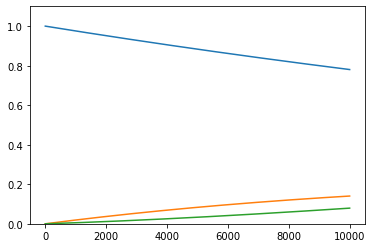

In [15]:
plt.figure()
plt.plot(sol.y[2])
plt.plot(sol.y[3])
plt.plot(sol.y[4])
plt.ylim(0, 1.1)
plt.show()

In [16]:
clebsh_gordan = np.array([
    [0, 0, 0],
    [0, 0, 0],
    [1.000, -0.333, 0.081],
    [-0.943, 0.457, -0.140],
    [0.886, -0.542, 0.198],
    [-0.828, 0.605, -0.256],
    [0.771, -0.652, 0.313],
    [-0.714, 0.686, -0.370],
    [0.657, -0.709, 0.428],
    [-0.600, 0.723, -0.485],
    [0.542, -0.728, 0.542],
    [0.485, -0.723, 0.600],
    [-0.428, 0.709, -0.657],
    [0.370, -0.686, 0.714],
    [-0.313, 0.652, -0.771],
    [0.256, -0.605, 0.828],
    [-0.198, 0.542, -0.886],
    [0.140, -0.457, 0.943],
    [-0.081, 0.333, -1.00],
    [0, 0, 0],
    [0, 0, 0]
])

clebsh_gordan_sq = clebsh_gordan**2

input_light = np.array([[0, 0, 1]]) # this is the polarization of the light sigma- / pi / sigma+

M = 17

clebsh_gordan_sq_eff_in = clebsh_gordan_sq*input_light

In [24]:
def dNdt_Dy(N, m):
    in1 = N[m-2]*clebsh_gordan_sq_eff_in[m-2,2]*clebsh_gordan_sq[m,0]
    in2 = N[m-1]*(clebsh_gordan_sq_eff_in[m-1,2]*clebsh_gordan_sq[m,1] + clebsh_gordan_sq_eff_in[m-1,1]*clebsh_gordan_sq[m,0])
    in3 = N[m+1]*(clebsh_gordan_sq_eff_in[m+1,0]*clebsh_gordan_sq[m,1] + clebsh_gordan_sq_eff_in[m+1,1]*clebsh_gordan_sq[m,2])
    in4 = N[m+2]*clebsh_gordan_sq_eff_in[m+2,0]*clebsh_gordan_sq[m,2]
    out1 = N[m]*clebsh_gordan_sq_eff_in[m,0]*(clebsh_gordan_sq[m-1,1]+clebsh_gordan_sq[m-2,2])
    out2 = N[m]*clebsh_gordan_sq_eff_in[m,1]*(clebsh_gordan_sq[m-1,2]+clebsh_gordan_sq[m+1,0])
    out3 = N[m]*clebsh_gordan_sq_eff_in[m,2]*(clebsh_gordan_sq[m+1,1]+clebsh_gordan_sq[m+2,0])
    return  s/(1+s)*(in1 + in2 + in3 + in4 - out1 - out2 - out3)

def system_Dy(tau, N):
    dN = [dNdt_Dy(N, m) for m in range(2, M + 2)]
    return [0, 0] + dN + [0, 0]

N_0_Dy = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]) # initial state

Tau = np.linspace(0,10000,10000)
#sol = odeint(system, [6,0,0,0], Tau, tfirst = True)
#r, phi, t = sol.transpose()
sol = solve_ivp(system_Dy, t_span = (0,10000), y0 = N_0_Dy, t_eval = Tau, atol = 10**-20, method = 'DOP853')

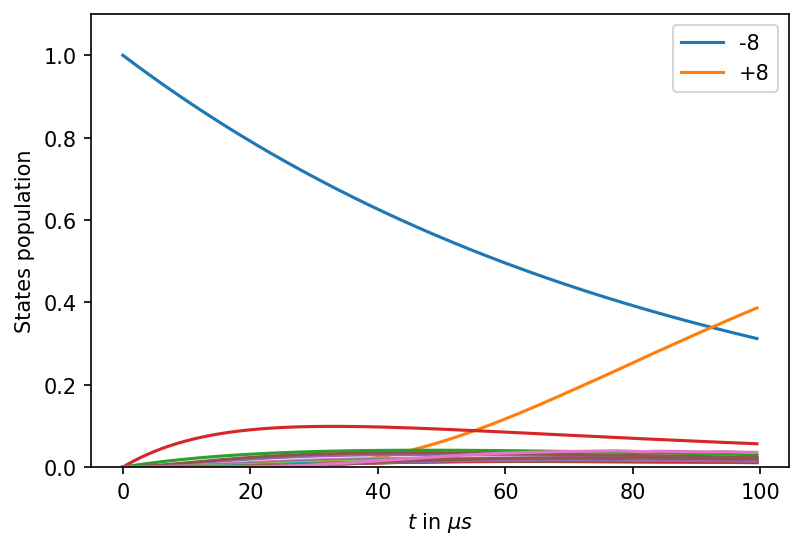

In [33]:
plt.figure(dpi = 150)
Tau_microsecond = Tau*2/(2*np.pi*32) # tau is in units of 2/Gamma
plt.plot(Tau_microsecond, sol.y[2], label = "-8")
plt.plot(Tau_microsecond, sol.y[2+M-1], label = "+8")
for i in range(3, 2+M-1):
    plt.plot(Tau_microsecond, sol.y[i])
plt.ylim(0, 1.1)
plt.legend()
plt.ylabel("States population")
plt.xlabel(r"$t$ in $\mu s$")
plt.show()